In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import os
from matplotlib import pyplot as plt
from sklearn import tree
from IPython.display import Image
from IPython.display import display
import matplotlib


# UM Data-Set

In [12]:
#create dataype dictionary for data, then import our cleaned data.
datatypes = {'Primary': 'category', 'UMSCUMCC': 'category', 'Age_at_dx': 'float', 'Sex': 'category',
       'Marital_status': 'category', 'Meno_stat': 'category', 'famhist': 'category', 'Nationality': 'category', 'Race': 'category',
       'diagnosis': 'category', 'Classification': 'category', 'Laterality': 'category', 'STAGEAJCC6': 'category',
       'Differentiation': 'category', 'ER_status': 'category', 'PR_status': 'category', 'CERB2_status': 'category', 'Pri_Rx': 'category',
       'Surgery_type': 'category', 'Axill_dissect': 'category', 'Radiotherapy': 'category', 'Chemotherapy': 'category',
       'Event': 'category'}

data = pd.read_csv('../clean_cancer_data.csv', sep='\t',dtype=datatypes).copy()
data.rename(index=str, columns={'Unnamed: 0':'Patient_num'},inplace=True)

In [13]:

proc_data = data[['Primary','UMSCUMCC','Age_at_dx','Sex','Marital_status','Meno_stat','famhist','Nationality','Race','diagnosis','Classification','Laterality','STAGEAJCC6','Differentiation','ER_status','PR_status','CERB2_status','Pri_Rx','Surgery_type','Axill_dissect','Radiotherapy','Chemotherapy']].copy()
cancer_target = data[['Event']].copy()
print(data.Event.value_counts())

1    2323
0     671
Name: Event, dtype: int64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(proc_data, np.ravel(cancer_target),stratify=np.ravel(cancer_target), test_size=0.20, random_state=101)

## SVM

In [15]:
#parameters taken from models notebook
svm = svm.SVC(C= 1000, gamma= 0.001, kernel= 'rbf')
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print("accuracy score: ",accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.13      0.22       134
           1       0.80      0.98      0.88       465

   micro avg       0.79      0.79      0.79       599
   macro avg       0.71      0.56      0.55       599
weighted avg       0.76      0.79      0.73       599

accuracy score:  0.7879799666110183


## Random Forest Experiment

In [16]:
overall_importance = np.zeros(len(proc_data.columns))
overall_accuracy = 0
acc_scores = []
model_list = []
r = 1000
for i in range(r):
    rfc = RandomForestClassifier(n_estimators=5,max_depth=5)
    rfc.fit(X_train, y_train)
    overall_importance += rfc.feature_importances_
    predictions = rfc.predict(X_test)
    overall_accuracy += accuracy_score(y_test,predictions)
    acc_scores.append(accuracy_score(y_test,predictions))
    model_list.append(rfc)

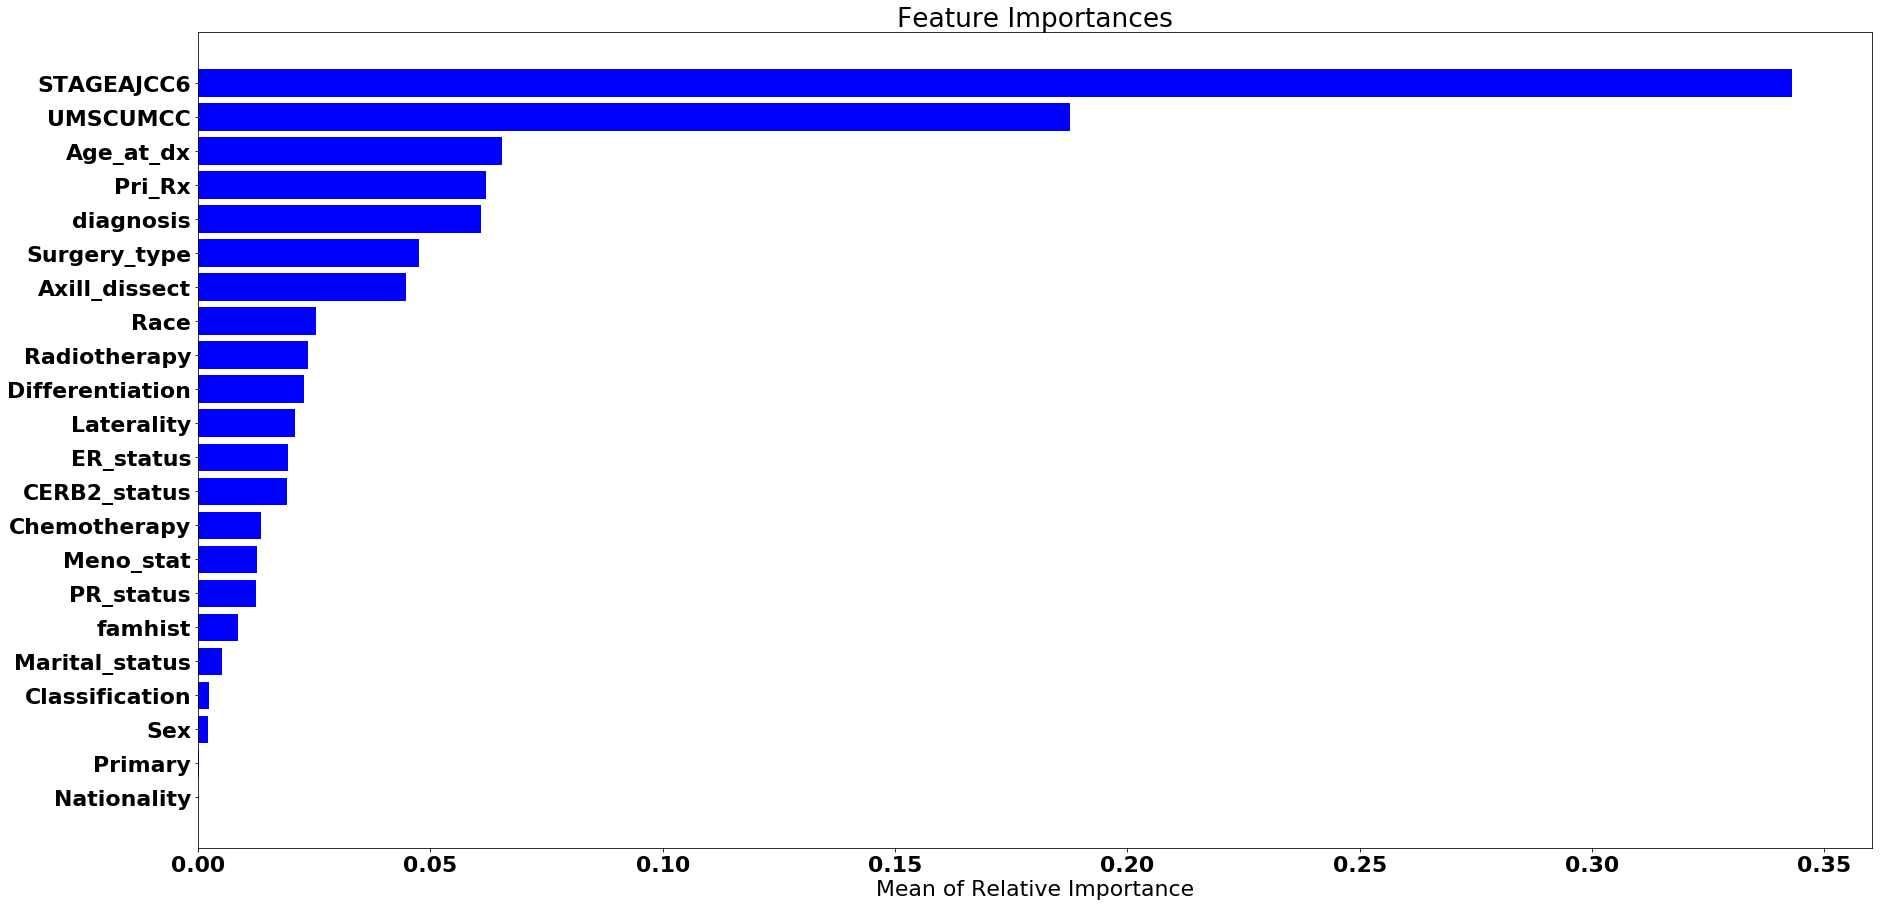

0.7910283806343891


In [41]:
average_importance = overall_importance/r
average_accuracy = overall_accuracy/r
features = proc_data.columns
indices = np.argsort(average_importance)


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)



fig= plt.figure(figsize=(30,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), average_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Mean of Relative Importance')





plt.show()
print(average_accuracy)

In [ ]:
#check accuracy of results and get the model with the best accuracy
acc_groups = pd.cut(acc_scores,[-1,0.5,0.6,0.7,0.75,0.8,0.85,0.9,1])
print(acc_groups.value_counts())
top = max(acc_scores)
top_position = acc_scores.index(top)
top_model = model_list[top_position]
print("Top Accuracy: ", top)

In [ ]:
#now print estimators in the "top_model" (the most accurate)
for i,estimator in enumerate(top_model.estimators_):
    name = 'tree' + str(i)
    tree.export_graphviz(estimator,feature_names=proc_data.columns,
                    filled=True,
                    rounded=True,out_file=name + '.dot')
    os.system('dot -Tpng ' + name + '.dot' +  ' -o ' + name + '.png')
    

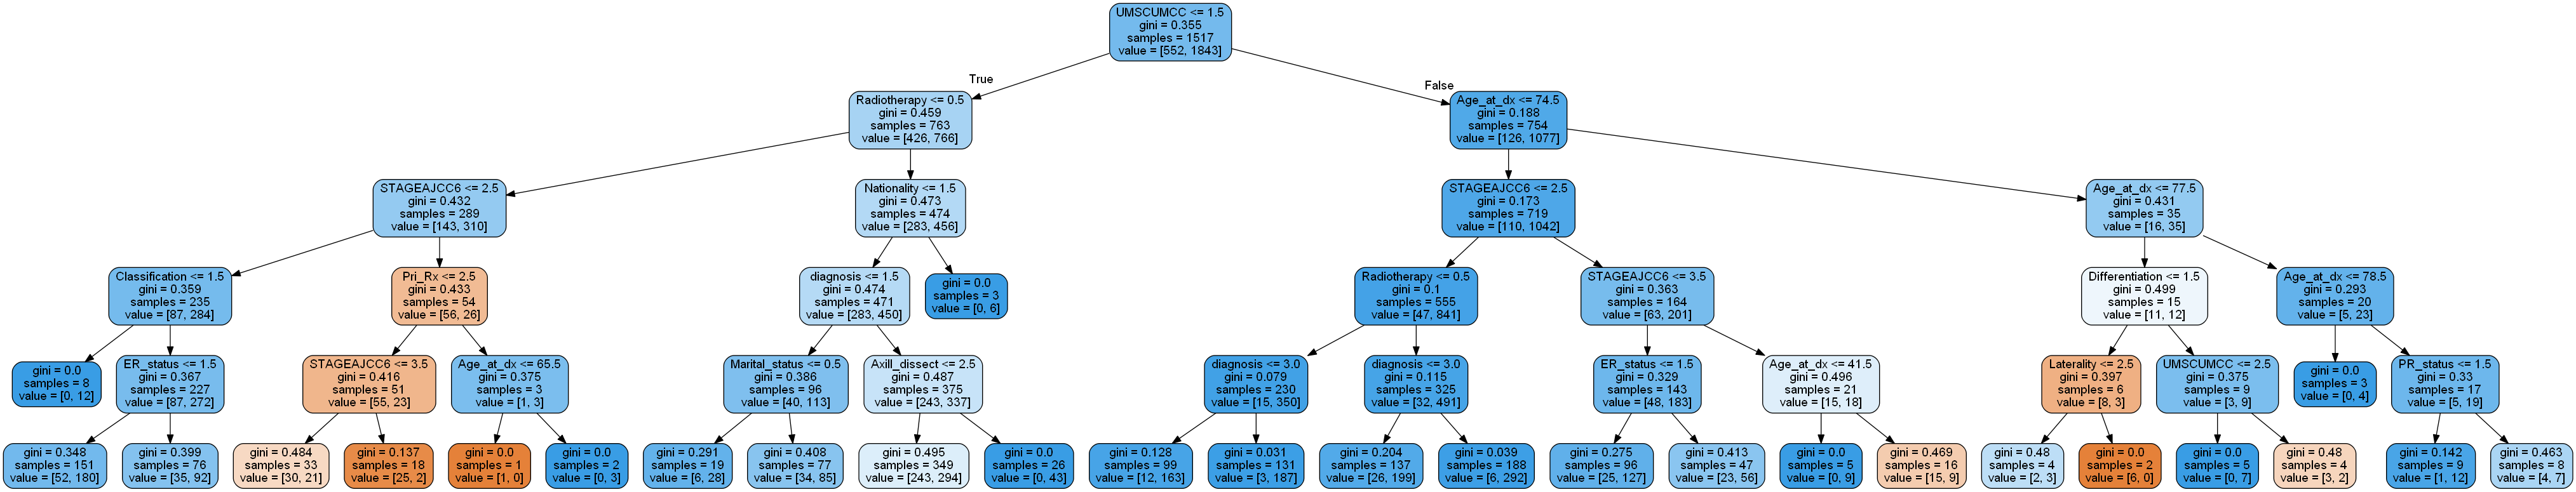

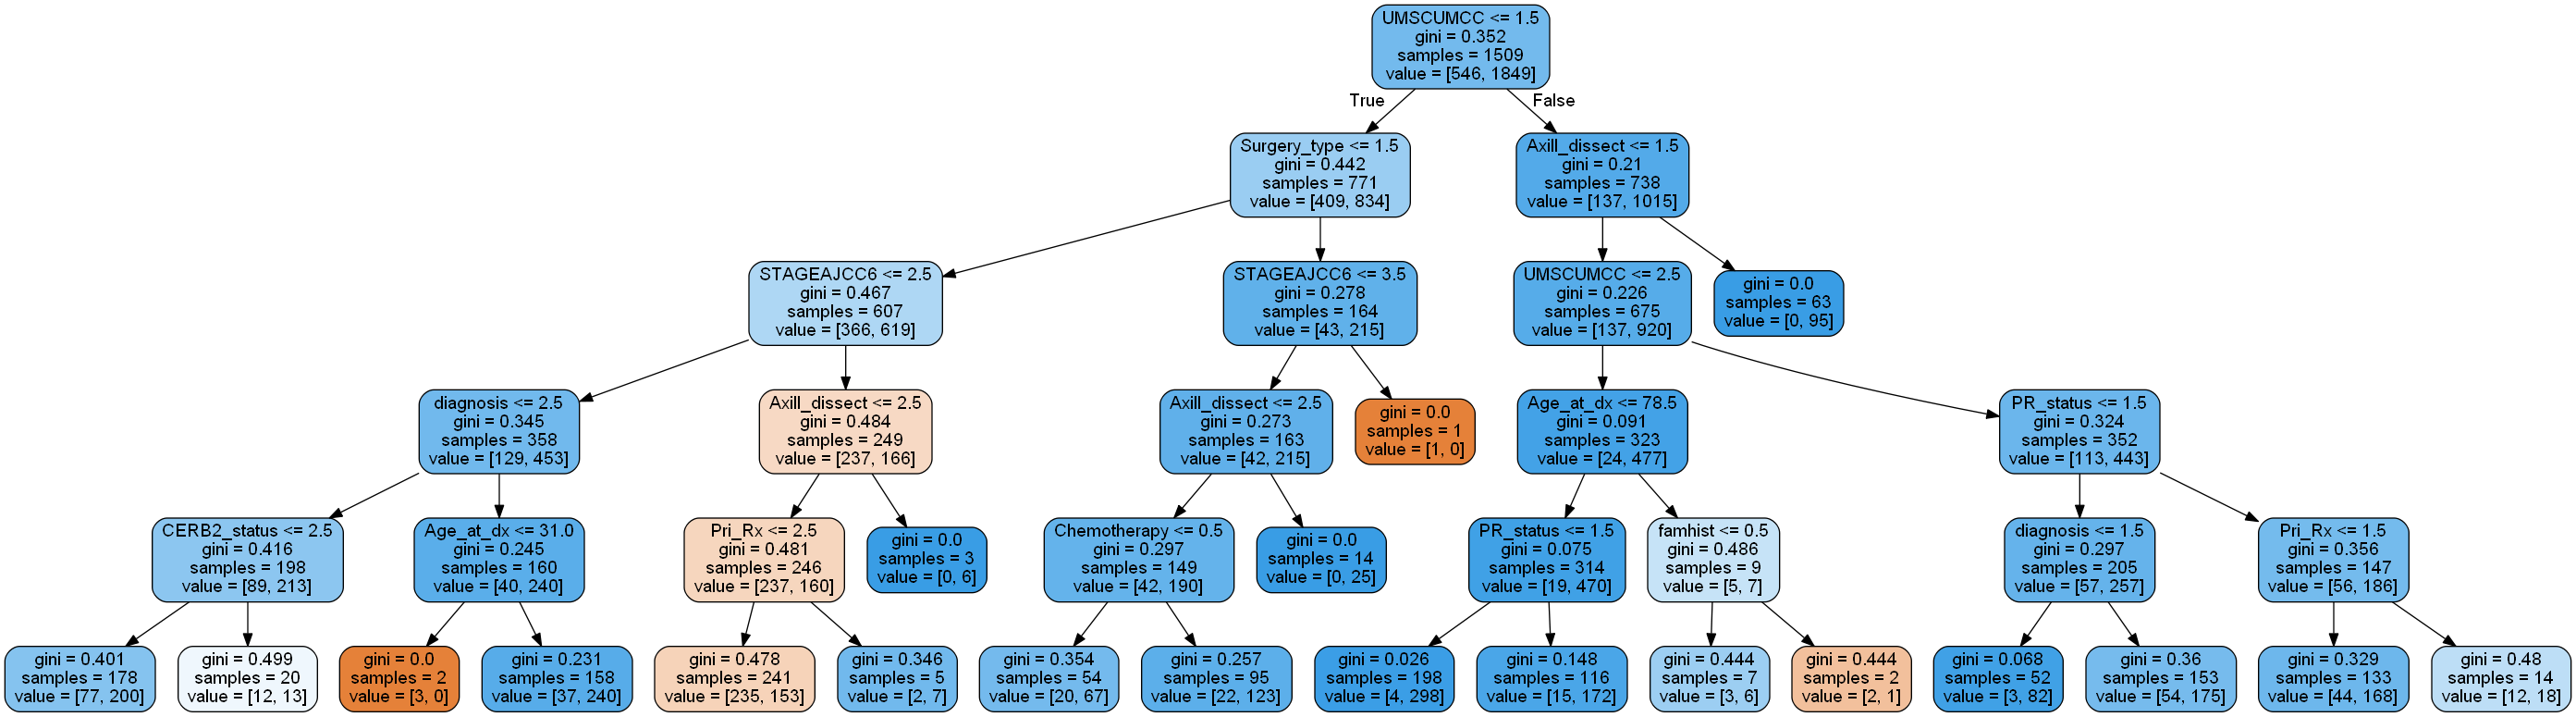

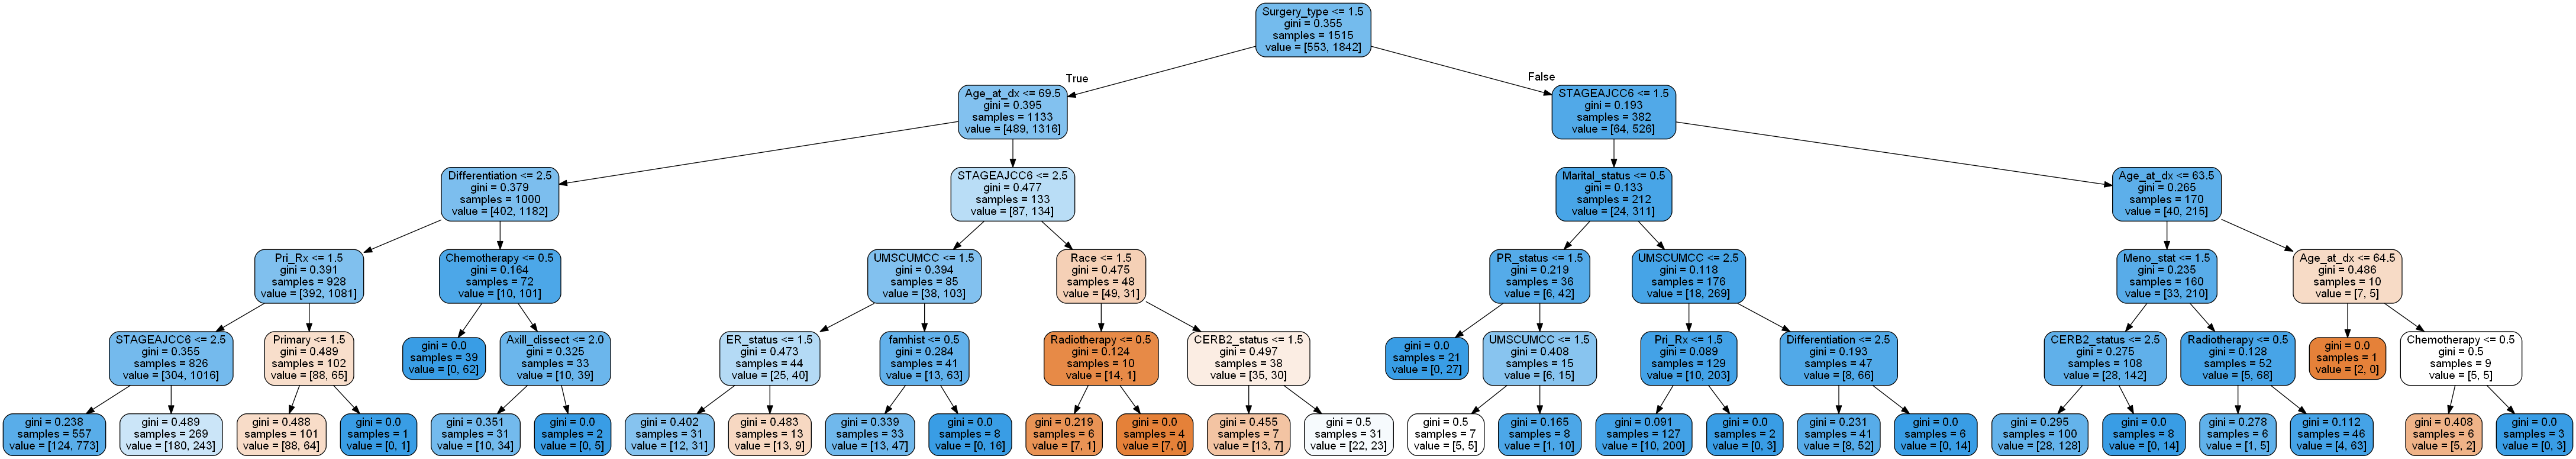

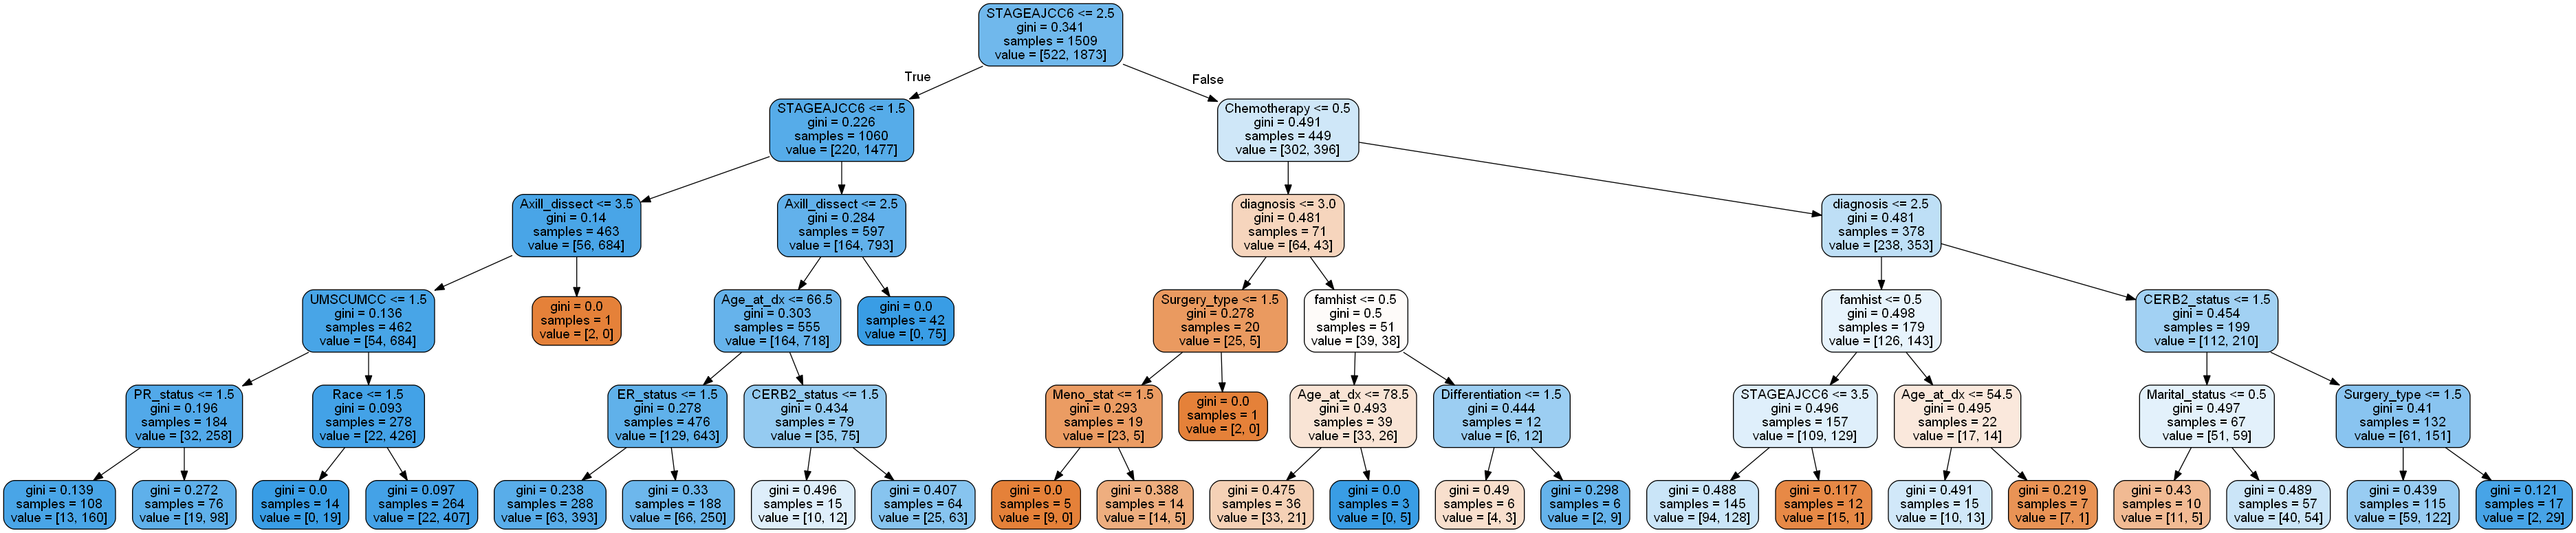

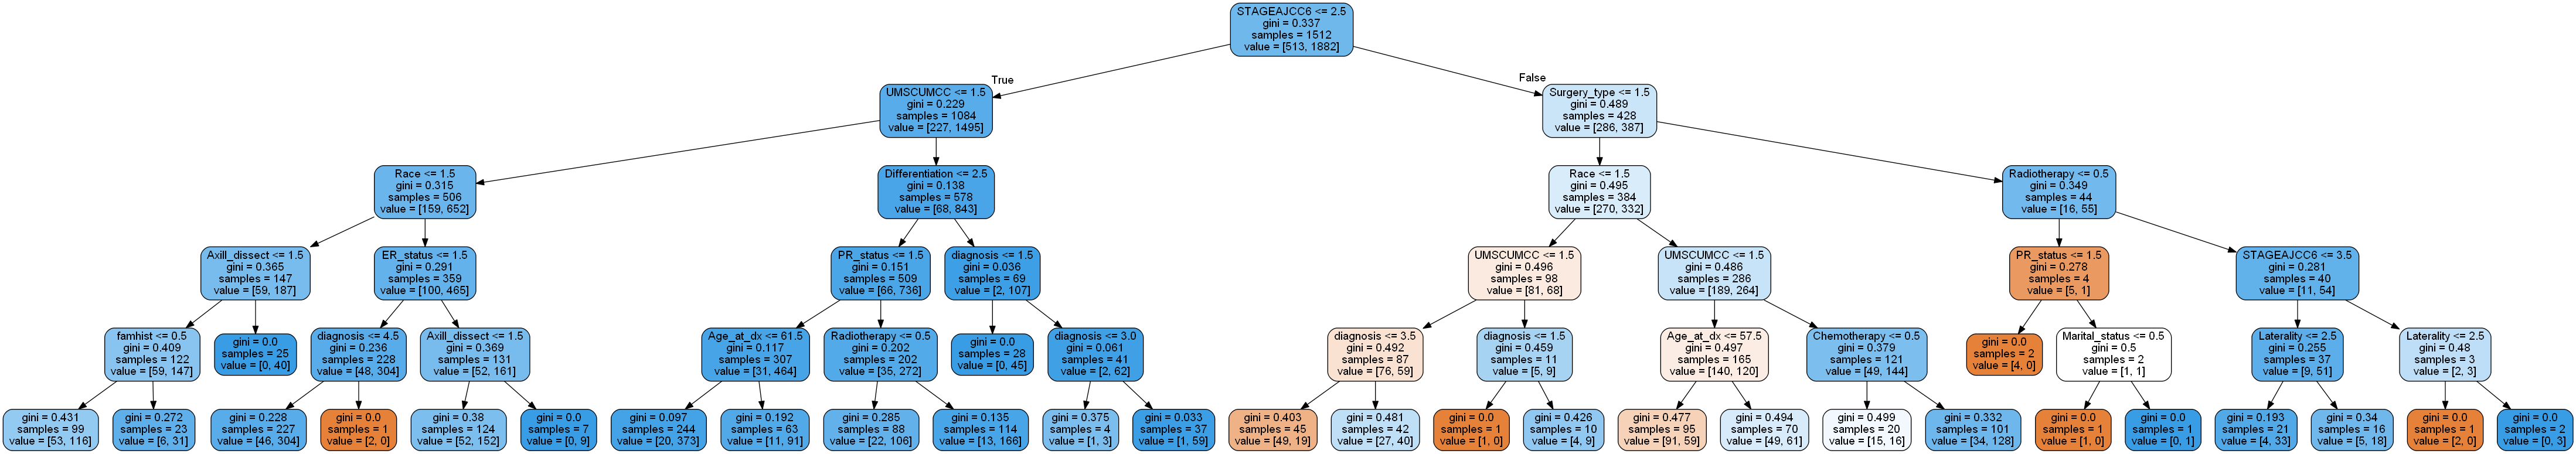

[]


In [109]:
# print enumerators   
    
images = [Image(filename = f"tree{i}.png") for i in range(5)]    
display(images[0],images[1],images[2],images[3],images[4])
print(estimator_accs)







    

# SEER Data-Set
